In [28]:
import mglearn
import sklearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


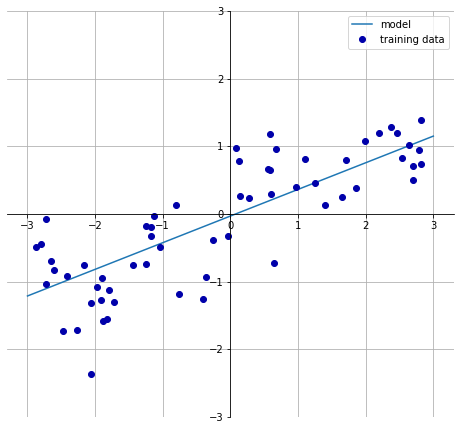

In [2]:
mglearn.plots.plot_linear_regression_wave()

#### 선형 회귀 (최소제곱법)

- 가장 간단하고 오래된 회귀용 선형 알고리즘

- 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터 w와 b를 갖는다.
- 평균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후 샘플의 개수로 나눈 것
- 매개변수가 없는 것이 장점이지만 반대로 모델의 복잡도를 제어할 방법도 없다.

In [6]:
X , y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

- 기울기 파라미터(w)는 가중치 또는 계수라고 하면 lr 객체의 coef_ 속성에 저장되어 있다.

- 편향 또는 절편 파라미터(b)는 intercept_ 속성에 저장되어 있다.

In [7]:
print(f'lr coef_: {lr.coef_}')
print(f'lr.intercept_: {lr.intercept_}')

## coef와 intercept 뒤에 _가 붙는 이유는 sklearn의 특성상 훈련데이터에서 유도된 속성에 _를 붙이는데 이는 사용자가 지정한 매개변수와 구분하기 위해서이다.

lr coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [10]:
print(f'훈련 세트 점수 : {lr.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {lr.score(X_test, y_test):.2f}')

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [ ]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [15]:
print(f'훈련 세트 점수 : {lr.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {lr.score(X_test, y_test):.2f}')

훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.78


- 훈련 데이터와 테스트 데이터 사이의 이런 성능 차이는 모델의 과대적합에 대한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야 한다.

------

#### 리지 회귀 (Ridge)

- 최소적합법에서 사용한 것과 같은 예측 함수 사용

- L2 규제 사용
- L2 규제란 w의 모든 원소가 0에 가깝게 만들어 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것
- 과대 적합이 되지 않도록 모델을 강제로 제한한다는 의미

In [18]:
ridge = Ridge().fit(X_train, y_train)

print(f'훈련 세트 점수 : {ridge.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {ridge.score(X_test, y_test):.2f}')

훈련 세트 점수 : 0.87
테스트 세트 점수 : 0.81


- Ridge 모델에서는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있다.

- 기본값은 1.0이며 alpha값을 높일 경우 계수를 0에 가깝게 만들어 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있다.
- alpha값을 줄이면 계수에 대한 제약이 풀리면서 LinearRegression으로 만든 모델에 가까워진다.

In [20]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print(f'훈련 세트 점수 : {ridge01.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {ridge01.score(X_test, y_test):.2f}')

훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.82


In [22]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print(f'훈련 세트 점수 : {ridge10.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {ridge10.score(X_test, y_test):.2f}')

훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.73


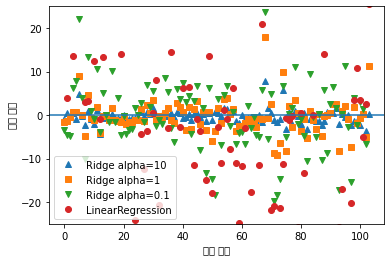

In [24]:
plt.plot(ridge10.coef_, "^", label='Ridge alpha=10')
plt.plot(ridge.coef_, "s", label='Ridge alpha=1')
plt.plot(ridge01.coef_, "v", label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

- alpha 값에 따라 coef_속성이 달라지는 것을 확인할 수 있다.

- 높은 alpha 값은 제약이 많은 모델이므로 작은 alpha 값보다 coef_의 절댓값 크기가 작은 것을 확인할 수 있었다.


c:\Users\dbswo\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

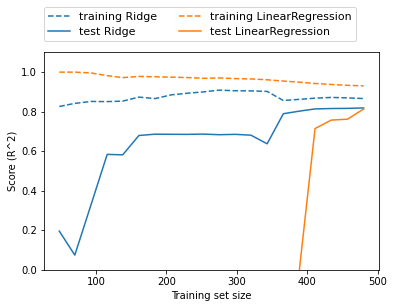

In [26]:
mglearn.plots.plot_ridge_n_samples()

- 데이터의 크기가 작을 경우는 Ridge의 점수가 더 높으나 데이터가 많아질수록 선형 회귀의 성능이 Ridge를 따라잡는다.

#### 배울 수 있는점
- 데이터의 크기가 충분할 경우 규제가 덜 중요해져서 Ridge와 선형 회귀의 성능이 같아질 것이라는 점

- 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지는데 위의 그림에서도 선형 회귀의 훈련 데이터 성능이 감소하는 것을 확인할 수 있다.

-------

#### 라소 회귀 (Lasso)

- L1 규제 사용. Ridge와 같이 Lasso도 계수를 0에 가깝게 하려고 한다.

- 차이점은 Lasso의 경우는 어떤 계수는 정말 0이 된다는 것. 모델에서 완전히 제외된다. 일종의 feature selection으로 볼 수 있다.

In [29]:
lasso = Lasso().fit(X_train, y_train)


print(f'훈련 세트 점수 : {lasso.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {lasso.score(X_test, y_test):.2f}')
print(f'사용한 특성의 개수 : {np.sum(lasso.coef_ != 0)}')

훈련 세트 점수 : 0.27
테스트 세트 점수 : 0.26
사용한 특성의 개수 : 3


In [30]:
## 과소적합을 줄이기 위해 alpha값을 줄이고 max_iter를 증가시킨다

lasso001 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)

print(f'훈련 세트 점수 : {lasso001.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {lasso001.score(X_test, y_test):.2f}')
print(f'사용한 특성의 개수 : {np.sum(lasso001.coef_ != 0)}')

훈련 세트 점수 : 0.75
테스트 세트 점수 : 0.70
사용한 특성의 개수 : 12


In [31]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print(f'훈련 세트 점수 : {lasso00001.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {lasso00001.score(X_test, y_test):.2f}')
print(f'사용한 특성의 개수 : {np.sum(lasso00001.coef_ != 0)}')

훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.81
사용한 특성의 개수 : 95


- alpha값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해진다.

Text(0, 0.5, '계수 크기')

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\minico

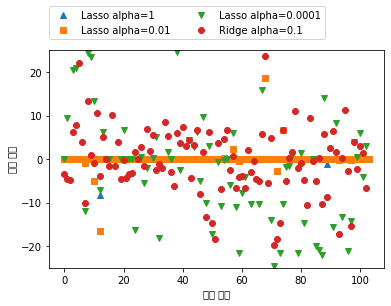

In [32]:
plt.plot(lasso.coef_, "^", label='Lasso alpha=1')
plt.plot(lasso001.coef_, "s", label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, "v", label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

- alpha 0.1의 경우는 대부분의 특성이 0이 되는 분포를 보인다.
- alpha 0.0001이 되면 계수 대부분이 0이 아니며 값도 커져 꽤 규제받지 않은 모델을 얻을 수 있다.
- alpha 0.1인 Ridge모델은 alpha=0.01인 Lasso모델과 성능이 비슷하지만 어떤 계수도 0이 되지는 않는다.

- 일반적으로 두 모델중에 Ridge가 선호되지만 데이터의 특성이 많고 일부분만 사용하기를 원한다면 Lasso가 나을 수도 있다.
- 또한 데이터의 일부만 사용하기 때문에 Lasso가 더 쉽게 해석할 수 있는 모델을 제공하는 장점도 있다.
- sklearn은 Lasso와 Ridge의 페널티를 결합한 ElasticNet도 제공하며 이 모델은 최상의 성능을 내지만 매개변수 두 개를 조정해야 한다.